Persamaan Difusi
-----
***

Persamaan difusi 1D adalah:

$$\frac{\partial u}{\partial t}= D \frac{\partial^2 u}{\partial x^2}$$

dimana $D$ merupakan koefisien difusi.

### Diskritisasi $\frac{\partial ^2 u}{\partial x^2}$

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=D\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

$$u_{i}^{n+1}=u_{i}^{n}+\frac{D\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

In [1]:
# import library yg diperlukan
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

nx = 50 # jumlah titik x
dx = 2 / (nx)
D = 0.4   # koefisien difusi
dt = 1/2 * dx**2 / D # menurut von neumann analysis

In [2]:
dt

0.002

In [3]:
dx

0.04

In [4]:
u = np.ones(nx)      #array berisi 1 sebanyak nx

un = np.ones(nx) #placeholder array

In [5]:
# fungsi untuk melakukan kalkulasi metode beda hingga untuk tiap waktu
def diffuse(tFinal):
    t = np.arange(0, tFinal, dt)
    x = np.linspace(0, 2, nx)
    u = np.sin(np.pi*x/2)
    y_num = np.array(['t', 'x', 'u(t, x)'])
    for n in t:
        un = u.copy()
        u[1:-1] = (un[1:-1] + D * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[0:-2])) #hasil diskritisasi
        u[0] = 0
        u[-1] = 0
        temp = np.hstack((np.full(len(x), n).reshape(-1,1), x.reshape(-1,1), u.reshape(-1,1)))
        y_num = np.vstack((y_num, temp))

    # plotting
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    surf = ax.scatter(x, u[:])
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    return y_num

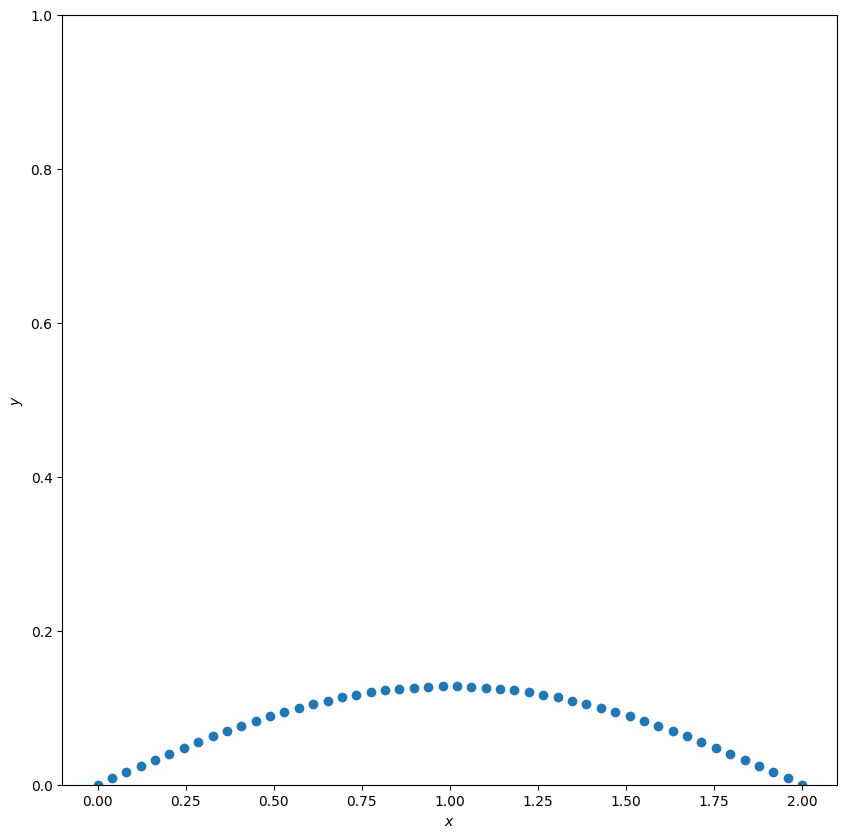

In [6]:
import time
start = time.time()
y_num = diffuse(2)
end = time.time()

In [7]:
end-start

4.850500822067261

In [8]:
df = pd.DataFrame(y_num[1:], columns=y_num[0], dtype=float)
df.index.names=['i']
df

,t,x,"u(t, x)"
i,,,
0,0.000,0.000000,0.000000
1,0.000,0.040816,0.063939
2,0.000,0.081633,0.127614
3,0.000,0.122449,0.190766
4,0.000,0.163265,0.253133
...,...,...,...
49995,1.998,1.836735,0.032435
49996,1.998,1.877551,0.024444
49997,1.998,1.918367,0.016352


In [9]:
df.to_csv("diffusiondata.csv")